<a href="https://colab.research.google.com/github/alejagaco/Prediccion-Precios-Vuelos/blob/main/Precios_Vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**Precios de vuelos**

Fuente de datos: Kaggle

Link: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837&sortBy=voteCount 

In [3]:
ruta = "/content/drive/MyDrive/Coding Dojo/Proyecto_2/Flight_Predictions.csv"
df = pd.read_csv(ruta)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## **Descripción de los datos**

El dataset contiene información de reservas de vuelos realizados en la página web Easemytrip, vuelos realizados entre las ciudadades principales de la India. 

Airline: Aerolinea del vuelo

Flight: Número del vuelo

Source_city: Ciudad Origen del vuelo

Departure_time: Periodo de tiempo de la salida del vuelo, 'Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',   'Late_Night'

stops: Número de escalas

arrival_time: Hora de llegada a la ciudad destino

destination_city: Ciudad destino

class: clase de vuelo si fue económica o ejecutiva

duration: Duración del vuelo en horas

days_left: Días de anticipación con que fue comprado el vuelo

price : Precio del tiquete aereo


## Objetivo

Predecir el precio de los tiquetes aereos


¿Este es un problema de clasificación o regresión?: Problema de regresión

¿Cuántas características hay?: El dataset cuenta con 10 características 

¿Cuántas características hay?: son 300153 filas

¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?: 

Con esta data se puede explorar:
* Como varian los precios por aerolinea
* Hay diferencia en el precio si se compra un día antes del vuelo vs varios días
* Cual es el comportaimiento del precio según la hora de salida.
* Como varía el precio según el número de escalas.
* Diferencia en el valor del tiquete para clase economica y ejecutiva

Adicional para predecir el precio de los tiquetes hay que realizar un preprocesamiento ya que la data cuenta con variables ordinales y nominales.


# EDA

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.drop(columns="Unnamed: 0",inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [10]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [11]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Visualization

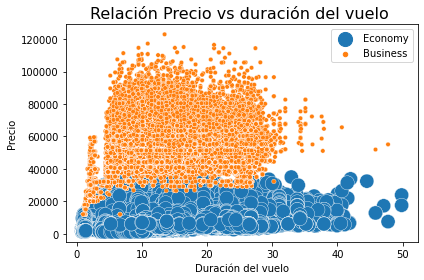

In [12]:
sns.scatterplot(data=df, x ='duration', y='price', hue='class', size='class',sizes=(20, 200))

plt.title('Relación Precio vs duración del vuelo ', fontsize=16)

plt.xlabel('Duración del vuelo', fontsize=10)
plt.ylabel('Precio', fontsize=10)

plt.legend(loc='best')

plt.tight_layout()
plt.show()

De acuerdo con el gráfico anterior se observa como los precios de vuelos mas elevados son en la clase Business, y adicional se evidencia algunos valores atípicos en el precio de esta clase, donde fue obtenido a precios similares a los de la clase económica.

In [13]:
precio_prom_aerolinea = df.groupby(['airline','class'])[['price']].mean().reset_index()
precio_prom_aerolinea.head()

,airline,class,price
0,AirAsia,Economy,4091.072742
1,Air_India,Business,47131.039212
2,Air_India,Economy,7313.682169
3,GO_FIRST,Economy,5652.007595
4,Indigo,Economy,5324.216303


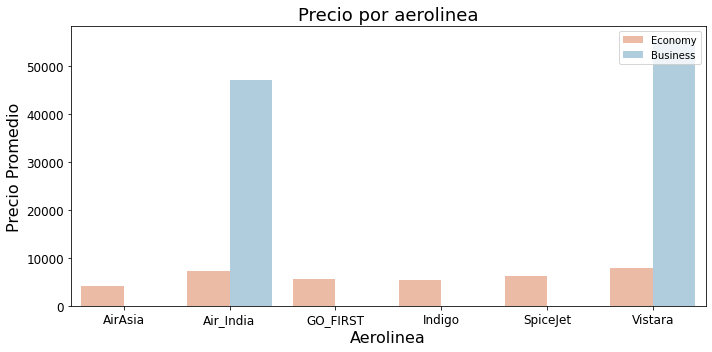

In [14]:
fig, ax = plt.subplots(figsize = (10, 5)) # Definir el tamaño del grafico, ancho, alto

ax1 = sns.barplot(data=precio_prom_aerolinea,x='airline',y='price',hue='class',palette=("RdBu"))

ax1.set_ylabel('Precio Promedio', fontsize=16)
ax1.set_xlabel('Aerolinea', fontsize=16)

plt.legend(loc='best')  #Ubicación automática para obtener la mejor ubicación
plt.title('Precio por aerolinea', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.tight_layout()
plt.show()

Las únicas dos aerolineas que ofrecen clase business son Air_India y Vistara, teniendo esta última un precio promedio mas elevado que Air_India. 

In [15]:
precio_prom_stops = df.groupby(['airline','stops'])[['price']].mean().reset_index()
precio_prom_stops.head()

,airline,stops,price
0,AirAsia,one,4096.963741
1,AirAsia,two_or_more,4432.956367
2,AirAsia,zero,3747.960970
3,Air_India,one,24805.782885
4,Air_India,two_or_more,13771.177062


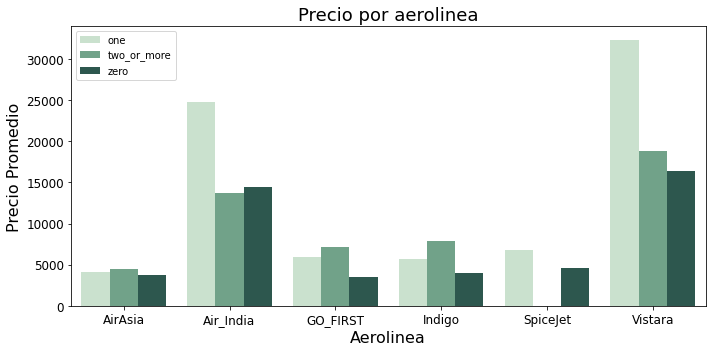

In [16]:
fig, ax = plt.subplots(figsize = (10, 5)) # Definir el tamaño del grafico, ancho, alto

ax1 = sns.barplot(data=precio_prom_stops,x='airline',y='price',hue='stops',palette=("ch:2.5,-.2,dark=.3"))

ax1.set_ylabel('Precio Promedio', fontsize=16)
ax1.set_xlabel('Aerolinea', fontsize=16)

plt.legend(loc='best')  #Ubicación automática para obtener la mejor ubicación
plt.title('Precio por aerolinea', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.tight_layout()
plt.show()

Se observa como en algunas aerolineas el precio promedio mas bajo es para los vuelos directos o que no tienen escala.

In [17]:
# Se reemplaza el número de escalas por números
# Zero: 0
# One: 1
# Two or more: 2
df['stops'].replace({'zero':0,'one':1,'two_or_more':2},inplace=True)

In [18]:
# Se reemplaza economic por 0 y Bussiness y 1
df['class'].replace({'Economy':0,'Business':1},inplace=True)

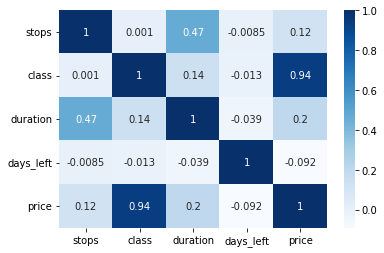

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

La variable que tiene una mayor relación con el precio, es la clase de viaje, tiene una relación directa del 94%.

# Machine Learning

In [20]:
df.drop(columns='flight',inplace=True) 
#Al hacer pruebas se evidencia que la columna flight no es relevante para la predicción del precio

In [21]:
df = pd.get_dummies(df,prefix=['airline',
                               #'flight',
                               'source_city','departure_time','arrival_time','destination_city'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  int64  
 1   class                         300153 non-null  int64  
 2   duration                      300153 non-null  float64
 3   days_left                     300153 non-null  int64  
 4   price                         300153 non-null  int64  
 5   airline_AirAsia               300153 non-null  uint8  
 6   airline_Air_India             300153 non-null  uint8  
 7   airline_GO_FIRST              300153 non-null  uint8  
 8   airline_Indigo                300153 non-null  uint8  
 9   airline_SpiceJet              300153 non-null  uint8  
 10  airline_Vistara               300153 non-null  uint8  
 11  source_city_Bangalore         300153 non-null  uint8  
 12  source_city_Chennai           300153 non-nul

In [23]:
# Matriz de característca y objetivo
X = df.drop(columns='price')
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.9)

In [25]:
scaler = StandardScaler()

In [26]:
modelo1 = LinearRegression()
reg = make_pipeline(scaler,modelo1)
reg.fit(X_train,y_train)
print("Score Train: ",round(reg.score(X_train, y_train),3))
print("Score Test: ",round(reg.score(X_test, y_test),3))

Score Train:  0.91
Score Test:  0.91


In [27]:
modelo2 = DecisionTreeRegressor()
dt= make_pipeline(scaler,modelo2)
dt.fit(X_train,y_train)
print("Score Train: ",round(dt.score(X_train, y_train),3))
print("Score Test: ",round(dt.score(X_test, y_test),3))

Score Train:  0.999
Score Test:  0.976
